# K Means Clustering

The $K$-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

### How the algorithm works

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters $Κ$ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the $Κ$ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

$\textbf{Data assigment step}$: Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$
where dist( · ) is the standard ($L_2$) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be $S_i$.

$\textbf{Centroid update step}$: In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i } x_i$$
The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

### Convergence and random initialization

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_orig = pd.read_csv('../../data/lab1/College.csv')

In [8]:
df.size


14763

In [9]:
df.shape

(777, 19)

## The Data

We will use a data frame with $777$ observations on the following 18 variables.


-  Private -  A factor with levels No and Yes indicating private or public university
-  Apps - Number of applications received
-  Accept -  Number of applications accepted
-  Enroll - Number of new students enrolled
-  Top10perc -  Pct. new students from top 10% of H.S. class
-  Top25perc -  Pct. new students from top 25% of H.S. class
-  F.Undergrad -  Number of fulltime undergraduates
-  P.Undergrad - Number of parttime undergraduates
-  Outstate -  Out-of-state tuition
-  Room.Board - Room and board costs
-  Books - Estimated book costs
-  Personal -  Estimated personal spending
-  PhD - Pct. of faculty with Ph.D.’s
-  Terminal - Pct. of faculty with terminal degree
-  S.F.Ratio - Student/faculty ratio
-  perc.alumni -  Pct. alumni who donate
-  Expend - Instructional expenditure per student
-  Grad.Rate -  Graduation rate


In [10]:
df.columns


Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

## Selection and Indexing Methods for Pandas DataFrames

-  The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.

> The iloc indexer syntax is $ \textbf{data.iloc[<row selection>, <column selection>]}$

## Selecting pandas data using “loc”

The Pandas loc indexer can be used with DataFrames for two different use cases:

-  Selecting rows by label/index
-  Selecting rows with a boolean / conditional lookup

### Rename Unnamed column - the university names

In [16]:
df.rename( columns={'Unnamed: 0':'University'}, inplace=True )

In [17]:
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [43]:
df.set_index('University', inplace=True)

### Setting values in DataFrames using .loc

With a slight change of syntax, you can actually update your DataFrame in the same statement as you select and filter using .loc indexer. This particular pattern allows you to update values in columns depending on different conditions. The setting operation does not make a copy of the data frame, but edits the original data.

In [17]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Preparing the labels for the instances

-  For this lab, for the purposes of cluster evaluation, we will use one of the columns as a held-out variable.
-  We will use the Grad.Rate column and bucket them into various categories to check whether the clusters can be predictive of the graduation rates of the schools

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229DE50AEF0>]],
      dtype=object)

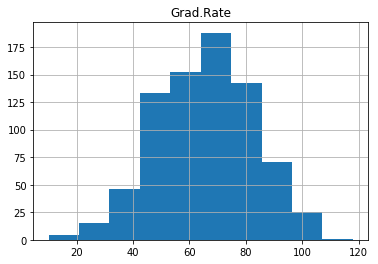

In [18]:
df.hist(column='Grad.Rate')

In [108]:
def bin_gradRate(x):
    if x<40:
        return 'Low' # low
    if x>=40 and x<60:
        return 'Medium' # medium
    if x>=60 and x<80:
        return 'High' # high
    else:
        return 'Very High' # very high


In [18]:
df['Grad.Rate.Bins'] = pd.cut(df['Grad.Rate'], 6, labels=list(range(6))) # Bins/Discretize the values into intervals

In [21]:
# df = df.drop('Grad.Rate', axis=1)

In [19]:
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Grad.Rate.Bins
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [23]:
df['Grad.Rate.Bins'].value_counts()

3    269
2    268
4    137
1     89
0     13
5      1
Name: Grad.Rate.Bins, dtype: int64

## Encoding categorical features

-  In this lab, we will focus on one-hot encoding the categorical features using the Pandas in-built functions
-  Alternatively, scikit-learn has methods for encoding categorical features https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features or Scikit-Learns's DictVectorizer https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

In [259]:
# use pd.concat to join the new columns with your original dataframe
df_encode = pd.concat([df,pd.get_dummies(df['Private'], prefix='private')],axis=1)

In [20]:
df.Private[df.Private == 'Yes'] = 1
df.Private[df.Private == 'No'] = 0

c:\python 3.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python 3.5\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Grad.Rate.Bins
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


#### Store the schools in a dictionary and drop that column

In [24]:
df = df.drop('University', axis=1)

In [25]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Grad.Rate.Bins
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [29]:
corr = pd.DataFrame()

list_target = ['Grad.Rate.Bins']
list_to_correlate = list(df.columns.values)[:-1]



df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

for a in list_target:
    for b in list_to_correlate:
        corr.loc[a, b] = df_corr.loc[a, b]

corr


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Grad.Rate.Bins,-0.051619,0.033116,0.039418,0.051142,0.078961,0.06918,0.030079,0.02944,0.043286,0.037707,-0.015279,-0.014289,0.03943,-0.054155,0.009642,0.095796,0.0349,0.418943


In [26]:
columns_to_select = ['Top10perc', 'Top25perc', 'perc.alumni', 'Enroll', 'Grad.Rate.Bins' ]

In [28]:
df_sel = df[columns_to_select]
df_sel.head()

,Top10perc,Top25perc,perc.alumni,Enroll,Grad.Rate.Bins
0,23,52,12,721,2
1,16,29,16,512,2
2,22,50,30,336,2
3,60,89,37,137,2
4,16,44,2,55,0


### Scikit learn user guide on clustering algorithms

To read more on K-Means implementation or other clustering algorithms, you can see the user guide at https://scikit-learn.org/stable/modules/clustering.html#k-means

$ \textit{class sklearn.cluster.KMeans}$(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')  

Some of the parameters we would use in this lab or for homeworks:

- n_clusters
- init
- max_iter

Returns:

- Labels
- Inertia





#### Create an instance of a K Means model with 6 clusters


In [75]:
from sklearn.cluster import KMeans

# The K Means fit function in scikit learn
kmeans = KMeans(n_clusters=6,init='random', verbose=0,tol=1e-3,max_iter=100,n_init=10)


#### Fit the model to all the data except for the Gard.Rate.Category

In [78]:
#df_sel = df_sel.drop('Grad.Rate.Bins', axis=1) # Remove this later
df_sel.head()

,Top10perc,Top25perc,perc.alumni,Enroll
0,23,52,12,721
1,16,29,16,512
2,22,50,30,336
3,60,89,37,137
4,16,44,2,55


In [50]:
X = np.array(df_sel)
X

array([[  23,   52,   12,  721],
       [  16,   29,   16,  512],
       [  22,   50,   30,  336],
       ...,
       [  34,   61,   20,  695],
       [  95,   99,   49, 1317],
       [  28,   63,   28,  691]], dtype=int64)

In [79]:
kmeans.fit(df_sel)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.001, verbose=0)

#### What are the cluster center vectors?



In [33]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[  40.09090909,   75.72727273,   20.54545455, 5299.        ],
       [  30.47191011,   57.29213483,   20.29213483, 1011.60674157],
       [  30.84792627,   61.05529954,   25.41013825,  528.17511521],
       [  34.16666667,   64.29166667,   17.25      , 2972.27083333],
       [  28.84722222,   59.15277778,   15.68055556, 1724.30555556],
       [  23.08529412,   49.49411765,   24.02647059,  224.36470588]])

#### Create a data frame with cluster centers and with column names borrowed from the original data frame

#### We want to measure the distance between a cluster center and a sample using Euclidean distance:

The distance is defined as:

\begin{equation}
d(p,q)= \sqrt{\sum_{i=1}^n (p_i - q_i)^2 }
\end{equation}



In [34]:
def _distance(a, b):
    return np.sqrt(((a - b)**2).sum())

In [35]:
def _nearest(clusters, x):
    return np.argmin([_distance(x, c) for c in clusters])

In [36]:
# Index for Arizona State University
for idx, s in schools_dict.items():    
#     print(s)
    if s == 'Arizona State University Main campus':
        print(idx)

23


#### Get the feature values for Arizona State University Main campus


In [37]:
feat_asu = df_sel.iloc[23]
feat_asu

Top10perc        24
Top25perc        49
perc.alumni       5
Enroll         3761
Name: 23, dtype: int64

In [38]:
feat_asu_arr = feat_asu.values
feat_asu_arr
# feat_asu_arr = feat_asu_arr[:-1]

array([  24,   49,    5, 3761], dtype=int64)

In [321]:
# df_orig = pd.read_csv('../../data/lab1/College.csv')
# df_orig = df_orig.rename(columns = {'Unnamed: 0': 'Schools'})

In [39]:
clus_cent.shape

(6, 4)

In [40]:
feat_asu_arr


array([  24,   49,    5, 3761], dtype=int64)

In [41]:

_nearest(clus_cent, feat_asu_arr.T)

3

## Silhouette Analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of $[-1, 1]$.

$\textbf{Silhouette coefficients}$ (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

### Silhouette Score

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score

X = df_sel.values

#kmeans.labels_.shape


print(silhouette_score(X, kmeans.labels_))

0.5561607011572851


### Scaling the features

For this experiment you are going to take 0 - 1 as the uniform value range across all the features.

Look at Scikit learn's MinMax scaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler


In [83]:
from sklearn.preprocessing import MinMaxScaler

X = df_sel.values

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

c:\python 3.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.23157895, 0.47252747, 0.1875    , 0.10791254],
       [0.15789474, 0.21978022, 0.25      , 0.07503539],
       [0.22105263, 0.45054945, 0.46875   , 0.04734938],
       ...,
       [0.34736842, 0.57142857, 0.3125    , 0.10382256],
       [0.98947368, 0.98901099, 0.765625  , 0.20166745],
       [0.28421053, 0.59340659, 0.4375    , 0.10319333]])

In [44]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.001, verbose=0)

In [61]:
df_scale_enroll = df_sel.copy()

df_scale_enroll['Enroll']/=10

#df_scale_enroll.head()

kmeans = KMeans(n_clusters=6,init='random', verbose=0,tol=1e-3,max_iter=100,n_init=10)
kmeans.fit(df_scale_enroll)

print(silhouette_score(np.array(df_scale_enroll), kmeans.labels_))


0.3788081379126243


### Initializing own cluster centers

As an example, let us initialize the cluster centers for the 6 clusters using the mode of the data points in each Grad.Rate.Bins interval

In [84]:
kmeans.fit(X_scaled)

print(silhouette_score(X_scaled, kmeans.labels_))

0.28299734086896544


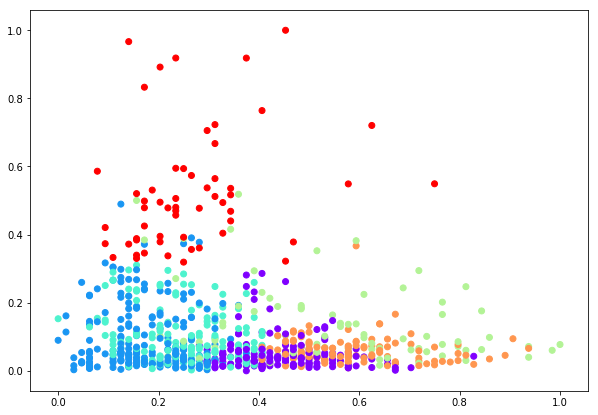

In [85]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled[:,2], X_scaled[:,3], c=kmeans.labels_, cmap='rainbow') 

### Evaluating when the labels are present


Formally, we define precision and recall for a set of clusters C and a set of classes Y as:

$$
\begin{equation}
    Precision = \frac{1}{n} \sum_{c \in C} \#_c
\end{equation}
$$

and 

$$
\begin{equation}
    Recall = \frac{1}{n} \sum_{y \in Y} \#_y
\end{equation}
$$

and 

$$
\begin{equation}
F1 = \frac{2PR}{P + R}
\end{equation}
$$

Here $\textbf{n}$ is the number of instances, $\textbf{C}$ denote the  clusters, $\textbf{Y}$ denote the  classes.
Here, $ \#_c$ is the largest number of instances in cluster c sharing the same class and $ \#_y $ the largest number of instances labeled y within one cluster.

## Hierarchical clustering in scikit-learn

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- $\textbf{Ward}$ minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- $\textbf{Maximum}$ or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- $\textbf{Average linkage}$ minimizes the average of the distances between all observations of pairs of clusters.
- $\textbf{Single linkage}$ minimizes the distance between the closest observations of pairs of clusters.

$\textbf{Single linkage}$: measures the closest pair of points


\begin{equation}
d_{single}(G, H) = min_{i \in G, j \in H} d_{ij}
\end{equation}



In [62]:
import scipy.cluster.hierarchy as shc


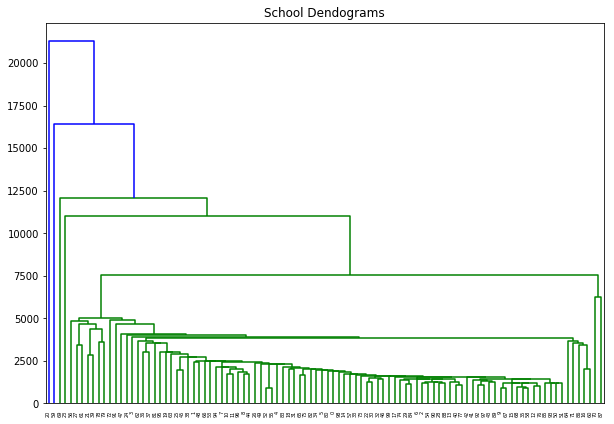

In [63]:
plt.figure(figsize=(10, 7))  
plt.title("School Dendograms")  
dend = shc.dendrogram(shc.linkage(df.values[:100], method='single'))  

In [71]:
from sklearn.cluster import AgglomerativeClustering

data = df_sel.values

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster_fit = cluster.fit(data)  

print(silhouette_score(data, cluster.labels_))

0.26468383128980927


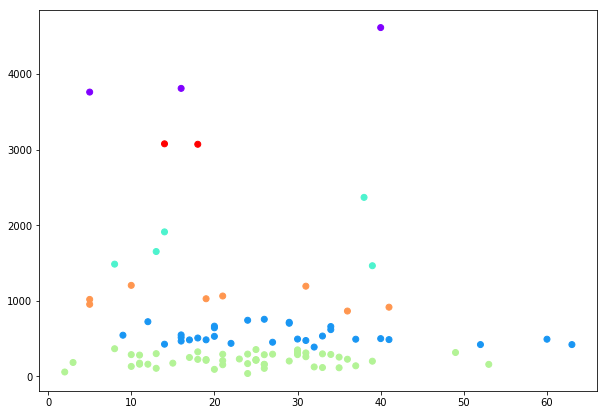

In [69]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,2], data[:,3], c=cluster.labels_, cmap='rainbow') 

In [66]:
# Function to convert the output of scikit-learn's AgglomerativeClustering into the linkage matrix required by
# scipy's dendrogram function
# It takes in the model fit by AgglomerativeClustering, plus all the usual arguments of the dendrogram
# function: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# Original by Mathew Kallada (BSD 3 licence), https://github.com/scikitlearn/scikit-learn/pull/3464/files
# Original computes numbers of children incorrectly
# Fixed by Derek Bridge 2017
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    tree_as_list = model.children_
    sizes = {}
    linkage_array = []
    start_idx = len(tree_as_list) + 1
    idx = start_idx
    for children in tree_as_list:
        linkage = []
        size = 0
        for child in children:
            linkage += [child]
            if child < start_idx:
                size += 1
            else:
                size += sizes.get(child)
        linkage += [idx - start_idx + 1, size]
        sizes[idx] = size
        idx += 1
        linkage_array += [linkage]
    dendrogram(np.array(linkage_array).astype(float), **kwargs)


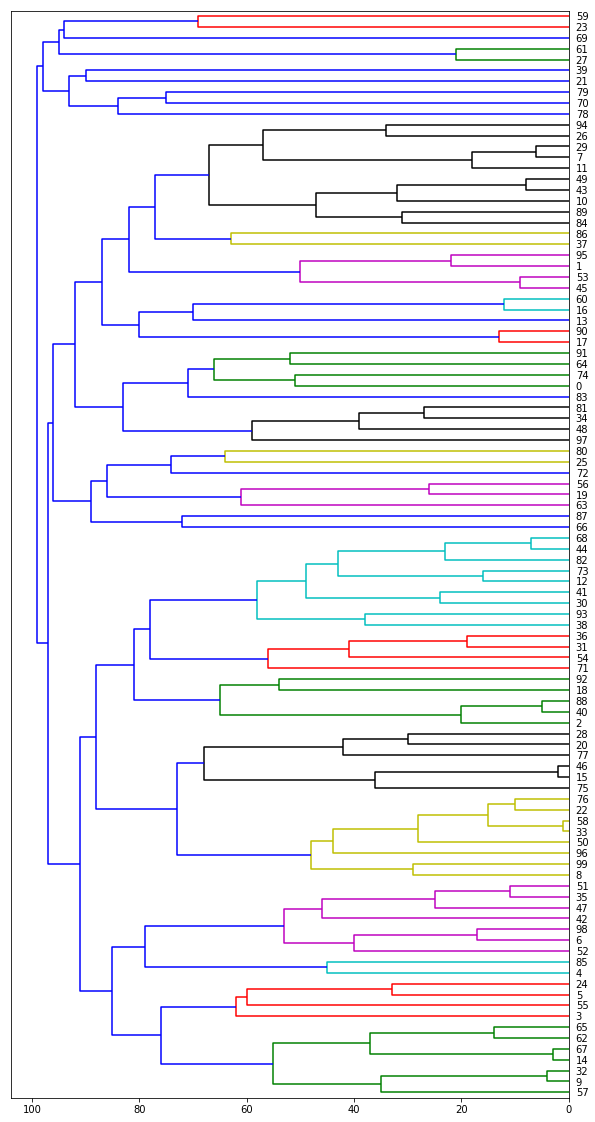

In [67]:
fig = plt.figure(figsize=(10,20))
plot_dendrogram(cluster_fit, orientation="left", leaf_font_size=10)
plt.show()

### Agglomerative Clustering: Discussion

1. You don't have to run the algorithm to completion. You could exit early: <br>

    1.1 when you have a certain number of clusters, or  <br>
    1.2 when the next merge would result in a 'bad' cluster, using some measure such as max distance within a cluster.<br>

2. This algorithm is only suitable for relatively small datasets <br>

    2.1 You would probably calculate the distance between every pair of objects in advance <br>
    2.2 But, in every iteration, it compares every cluster with every other <br>
